In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

In [85]:
df = pd.read_csv("D:\Project\Car-Evaluation\Dataset\Final\DataDeleteNoiseMileageWeirdBrandFillData.csv")

In [86]:
df.shape

(29812, 21)

In [87]:
df.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'engine_capacity', 'transmission', 'drive_type',
       'fuel_consumption', 'brand', 'grade', 'year_of_manufacture', 'car_name',
       'price', 'url', 'price_in_billion'],
      dtype='object')

In [88]:
df_delete_noise_mileage = df[(df["condition"] == "New car") | (df["mileage"] >= 350)]

In [89]:
df_delete_noise_mileage.shape

(25380, 21)

In [90]:
df_delete_noise_mileage.to_csv("DataDeleteNoiseValue_v1.csv", index = False)

In [93]:
df = pd.read_csv("DataDeleteNoiseValue_v1.csv")

In [92]:
df.shape

(25380, 21)

# Brand ranking (part 1)

In [101]:
df["brand"].unique()

array(['Suzuki', 'Toyota', 'Honda', 'Ford', 'Mitsubishi', 'Hyundai',
       'Volvo', 'Isuzu', 'Daewoo', 'Mercedes-Benz', 'Hino', 'Mazda',
       'Audi', 'Subaru', 'Kia', 'LandRover', 'BMW', 'VinFast',
       'Volkswagen', 'Mini', 'Peugeot', 'MG', 'Acura', 'Chevrolet',
       'Cadillac', 'Jeep', 'Lexus', 'Chrysler', 'Nissan', 'RAM',
       'Infiniti', 'Jaguar', 'Rolls-Royce', 'Porsche', 'Baic', 'Hongqi',
       'Bentley', 'Citroen', 'Maserati', 'SYM', 'Ssangyong',
       'Aston_Martin', 'Vinaxuki', 'Samsung', 'Gaz', 'Thaco', 'Lincoln',
       'Tesla', 'Luxgen', 'Dongfeng', 'UAZ', 'Renault', 'McLaren',
       'Pontiac', 'Lamborghini', 'Honda ', 'Ferrari', 'Zotye', 'Smart',
       'Daihatsu', 'GMC', 'Proton', 'Dongben', 'Chery', 'Fiat',
       'Brilliance', 'Mekong', 'Geely', 'Tobe', 'Dodge', 'JRD', 'Changan'],
      dtype=object)

In [92]:
brand_ranking = pd.read_csv("brandirectory-ranking-data-automobiles-2023.csv")

In [93]:
brand_ranking = brand_ranking[["Brand", "Position"]]

In [94]:
brand_ranking.set_index("Brand", inplace = True)

In [95]:
brand_ranking = brand_ranking["Position"].to_dict()

In [96]:
brand_ranking.update({'Mini': 6, 'Rolls-Royce': 1, 'Mitsubishi': 101,'VinFast': 103})

In [98]:
df["brand"]

0        Suzuki
1        Toyota
2        Toyota
3        Toyota
4        Toyota
          ...  
26197       NaN
26198       NaN
26199       NaN
26200       NaN
26201       NaN
Name: brand, Length: 26202, dtype: object

In [122]:
df["Brand_Ranking"] = df["brand"].apply(lambda x: brand_ranking.get(x.strip(), 102))

In [123]:
df.shape

(26195, 23)

# Fill empty engine_capacity by mean and median value

In [102]:
df.to_csv("DataDeleteNoiseValue_Final.csv", index = False)

In [123]:
df = pd.read_csv("DataDeleteNoiseValue_Final.csv")

In [141]:
df = pd.read_csv("DataDeleteNoiseValue_v1.csv")

In [105]:
def fill_group_median(group, col):
    median = group[col].median()
    if median:
        group[col] = group[col].replace(0, median)
    return group
def fill_group_mean(group, col):
    mean = group[col].mean()
    if mean:
        group[col] = group[col].replace(0, mean)
    return group

In [125]:
df = df.groupby(["grade", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\3352657006.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["grade", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))


In [127]:
df[df["engine_capacity"] == 0].shape

(214, 23)

In [129]:
df = df.groupby(["car_model", "brand", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\1280890678.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["car_model", "brand", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))


In [130]:
df[df["engine_capacity"] == 0].shape

(197, 23)

In [132]:
df = df.groupby(["car_model", "brand"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\3272930973.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["car_model", "brand"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))


In [133]:
df[df["engine_capacity"] == 0].shape

(133, 23)

In [134]:
df = df.groupby(["car_model"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\2400900664.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["car_model"], group_keys=False).apply(lambda group: fill_group_median(group, "engine_capacity"))


In [135]:
df[df["engine_capacity"] == 0].shape

(0, 23)

In [136]:
df[df["fuel_consumption"] == 0].shape

(713, 23)

In [137]:
df = df.groupby(["grade", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\607899678.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["grade", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))


In [138]:
df[df["fuel_consumption"] == 0].shape

(709, 23)

In [139]:
df = df.groupby(["car_model", "brand", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\1042082703.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["car_model", "brand", "year_of_manufacture"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))


In [140]:
df[df["fuel_consumption"] == 0].shape

(344, 23)

In [141]:
df = df.groupby(["car_model", "brand"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\1434031687.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["car_model", "brand"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))


In [142]:
df[df["fuel_consumption"] == 0].shape

(165, 23)

In [143]:
df = df.groupby(["car_model"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\2532562666.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(["car_model"], group_keys=False).apply(lambda group: fill_group_median(group, "fuel_consumption"))


In [144]:
df[df["fuel_consumption"] == 0].shape

(0, 23)

In [231]:
df1[df1["fuel_consumption"] == 0].shape
df1.columns

Index(['ad_id', 'origin', 'condition', 'car_model', 'mileage',
       'exterior_color', 'interior_color', 'num_of_doors', 'seating_capacity',
       'engine', 'engine_capacity', 'transmission', 'drive_type',
       'fuel_consumption', 'brand', 'grade', 'year_of_manufacture', 'car_name',
       'price', 'url', 'price_in_billion', 'log_price'],
      dtype='object')

In [230]:
df[df["fuel_consumption"] == 0].shape

(0, 23)

In [242]:
df1_not_missing_fuel_consumption = df1[df1["fuel_consumption"] > 0]

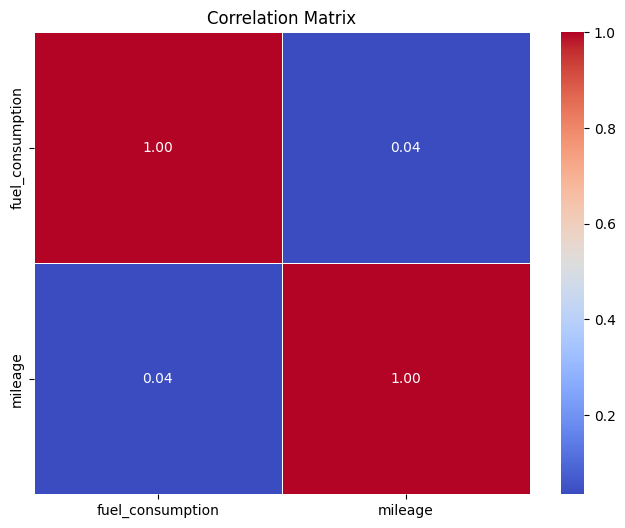

In [243]:
# Calculating correlation matrix
correlation_matrix = df1_not_missing_fuel_consumption[["fuel_consumption", "mileage"]].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

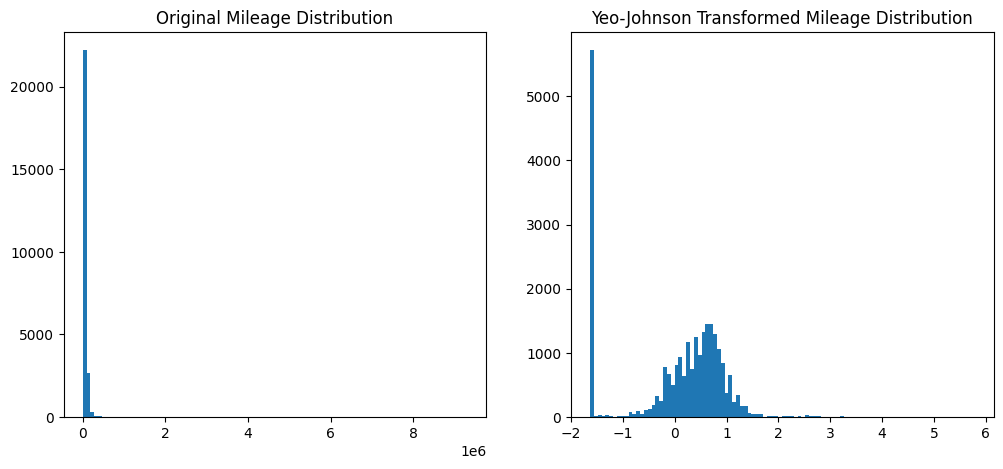

C:\Users\fpt47\AppData\Local\Temp\ipykernel_29164\3255965534.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_not_missing_fuel_consumption["Yeo_Johnson_mileage"] = transformed_data.flatten()


In [244]:
data = df1_not_missing_fuel_consumption["mileage"].to_numpy()

# Apply Yeo-Johnson Transformation
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
transformed_data = yeo_johnson_transformer.fit_transform(data.reshape(-1, 1))

# Plot original and transformed Mileage distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Mileage distribution
axs[0].hist(df1_not_missing_fuel_consumption["mileage"], bins = 100)
axs[0].set_title("Original Mileage Distribution")

# Transformed Mileage distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Yeo-Johnson Transformed Mileage Distribution")
plt.show()

df1_not_missing_fuel_consumption["Yeo_Johnson_mileage"] = transformed_data.flatten()

In [245]:
df1_not_missing_fuel_consumption.shape

(25482, 23)

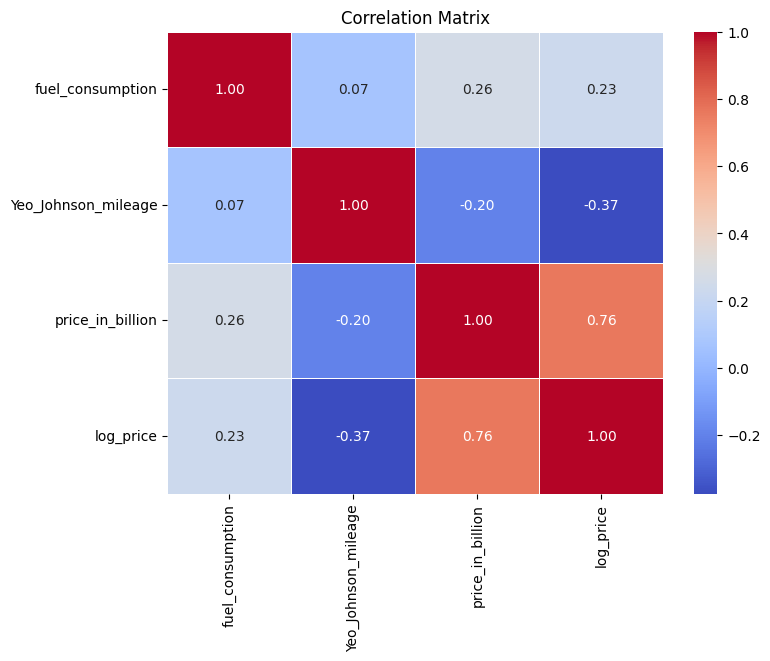

In [246]:
# Calculating correlation matrix
correlation_matrix = df1_not_missing_fuel_consumption[["fuel_consumption", "Yeo_Johnson_mileage", "price_in_billion", "log_price"]].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.to_csv("DataDeleteNoiseValue_v1.csv", index = False)

# Brand ranking (part 2)

In [145]:
df = pd.read_csv("DataDeleteNoiseValue_v1.csv")

In [145]:
df["brand"].unique()

array(['Suzuki', 'Toyota', 'Honda', 'Ford', 'Mitsubishi', 'Hyundai',
       'Volvo', 'Isuzu', 'Daewoo', 'Mercedes-Benz', 'Hino', 'Mazda',
       'Audi', 'Subaru', 'Kia', 'LandRover', 'BMW', 'VinFast',
       'Volkswagen', 'Mini', 'Peugeot', 'MG', 'Acura', 'Chevrolet',
       'Cadillac', 'Jeep', 'Lexus', 'Chrysler', 'Nissan', 'RAM',
       'Infiniti', 'Jaguar', 'Rolls-Royce', 'Porsche', 'Baic', 'Hongqi',
       'Bentley', 'Citroen', 'Maserati', 'SYM', 'Ssangyong',
       'Aston_Martin', 'Vinaxuki', 'Samsung', 'Gaz', 'Thaco', 'Lincoln',
       'Tesla', 'Luxgen', 'Dongfeng', 'UAZ', 'Renault', 'McLaren',
       'Pontiac', 'Lamborghini', 'Honda ', 'Ferrari', 'Zotye', 'Smart',
       'Daihatsu', 'GMC', 'Proton', 'Dongben', 'Chery', 'Fiat',
       'Brilliance', 'Mekong', 'Geely', 'Tobe', 'Dodge', 'JRD', 'Changan'],
      dtype=object)

In [146]:
df[df["Brand_Ranking"] == 102].shape

(401, 23)

In [147]:
df_delete_weird_brand = df[df["Brand_Ranking"] != 102]

In [148]:
df_delete_weird_brand.shape

(25794, 23)

In [149]:
df_delete_weird_brand.to_csv("DataDeleteNoiseMileageWeirdBrandFillData.csv", index = False)

In [172]:
df_delete_weird_brand.to_csv("DataDeleteWeirdBrand_Final.csv", index = False)

# New car price

In [2]:
df = pd.read_csv("DataDeleteWeirdBrand_Final.csv")
df.set_index("ad_id", inplace = True)

In [13]:
df_new_car = df[df["mileage"] == 0]

# Remove outliers

In [19]:
df = pd.read_csv("Data.csv")
df.set_index("ad_id", inplace = True)

In [20]:
df.shape

(30652, 20)

Approach 1: Using Standard Scaling

In [24]:
mean_mileage = df["mileage"].mean()
std_mileage = df["mileage"].std()
filter_df = (df["condition"] == "Used car") & (abs(df["mileage"] - mean_mileage) > 3*std_mileage)

Approach 2: Using IQR

In [38]:
def remove_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    filter = (df["condition"] == "New car") | ((df[column] >= lower_bound) & (df[column] <= upper_bound))
    reverse_filter = (df["condition"] == "Used car") & ((df[column] <= lower_bound) | (df[column] >= upper_bound))
    df_filtered = df[filter]
    df_reverse_filtered = df[reverse_filter]
    return df_filtered, df_reverse_filtered

In [39]:
df_delete_noise_mileage, df_noise_milage = remove_outliers_iqr(df, "mileage")

In [40]:
df_delete_noise_mileage.shape

(29928, 20)

Approach 3: Manually

In [44]:
filter = (df["condition"] == "New car") | ((df["mileage"] >= 350) & (df["mileage"] < 1e6))
reverse_filter = (df["condition"] == "Used car") & ((df["mileage"] < 350) | (df["mileage"] >= 1e6))

df_delete_noise_milage = df[filter]
df_noise_milage = df[reverse_filter]

In [46]:
df_noise_milage.to_csv("DataNoiseMileage.csv")
df_delete_noise_milage.to_csv("DataDeleteNoiseMileage.csv")

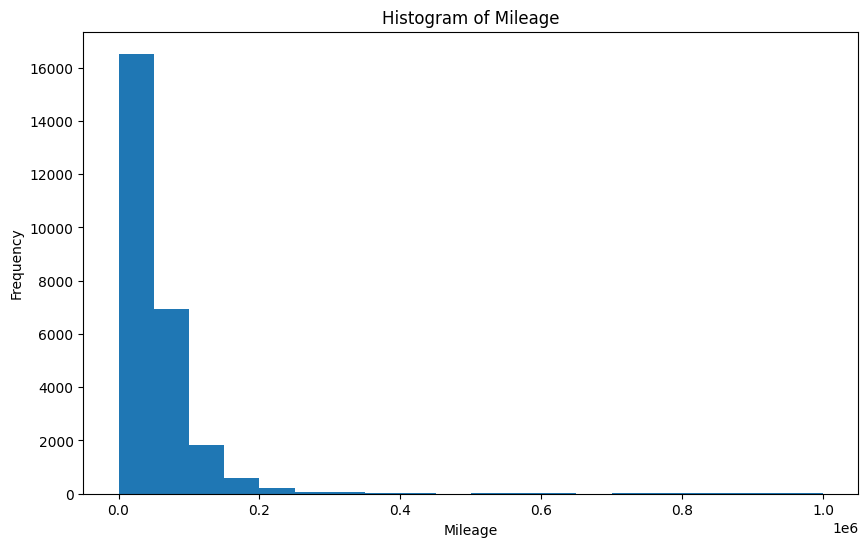

In [6]:
# 1. Plot the Entire Distribution
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.hist(df_delete_noise_mileage["mileage"], bins=20)  # Start with 20 bins, adjust as needed
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()


# Plotting numerical feature

In [ ]:
df = pd.read_csv("DataDeleteNoiseMileage.csv")
df.set_index("ad_id")

In [241]:
df1 = pd.read_csv("DataDeleteNoiseMileage.csv")
df1.set_index("ad_id")

,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,engine_capacity,...,drive_type,fuel_consumption,brand,grade,year_of_manufacture,car_name,price,url,price_in_billion,log_price
ad_id,,,,,,,,,,,,,,,,,,,,,
17042,Domestic assembly,New car,Truck,0,White,Grey,2,2,Petrol,1.0,...,RFD,10.1,Suzuki,Super_Carry,2022,Suzuki Super Carry Truck 1.0 MT 2022,249 Million\r\n,https://bonbanh.com/xe-suzuki-super_carry_truc...,0.249,19.332963
53794,Imported,New car,SUV,0,Black,Black,5,7,Petrol,3.4,...,AWD,12.8,Toyota,Land_Cruiser,2022,Toyota Land Cruiser 3.5 V6 2022,4 Billion 286 Million\r\n,https://bonbanh.com/xe-toyota-land_cruiser-3.5...,4.286,22.178620
73954,Domestic assembly,New car,Crossover,0,Silver,Brown,5,8,Petrol,2.0,...,RFD,11.0,Toyota,Innova,2023,Toyota Innova G 2.0 AT 2023 car,885 Million\r\n,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...,0.885,20.601098
74150,Imported,New car,SUV,0,White,Black,5,5,Petrol,1.8,...,FWD,6.5,Toyota,Corolla_Cross,2023,Toyota Corolla Cross 1.8G 2023,754 Million\r\n,https://bonbanh.com/xe-toyota-corolla_cross-1....,0.754,20.440903
87573,Domestic assembly,New car,Crossover,0,Silver,Grey,5,8,Petrol,2.0,...,RFD,11.0,Toyota,Innova,2022,Toyota Innova G 2.0 AT 2022 car,840 Million\r\n,https://bonbanh.com/xe-toyota-innova-g-2.0-at-...,0.840,20.548912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919601,Domestic assembly,Used car,Truck,1500000,White,Black,2,2,Diesel,0.0,...,RFD,8.0,Hyundai,Porter,1999,Hyundai Porter 1999,50 Million\r\n,https://bonbanh.com/xe-hyundai-porter--1999-49...,0.050,17.727534
4920378,Domestic assembly,Used car,Crossover,1300000,Silver,Black,5,7,Petrol,2.0,...,FWD,12.5,Kia,Carens,2011,Kia Carens SXAT 2011,285 Million\r\n,https://bonbanh.com/xe-kia-carens-sxat-2011-49...,0.285,19.468000
4923004,Domestic assembly,Used car,Hatchback,1500000,White,Colorful,5,5,Petrol,0.8,...,FWD,8.3,Daewoo,Matiz,2006,Daewoo Matiz SE 0.8 MT 2006,45 Million\r\n,https://bonbanh.com/xe-daewoo-matiz-se-0.8-mt-...,0.045,17.622173


In [ ]:
df.columns

1. Price

In [ ]:

df['log_price'] = np.log(df['price_in_billion']*1e9)

# Create the plot
sns.scatterplot(x=df.index, y='log_price', data=df) 
plt.xlabel("Car Index")
plt.ylabel("Log(Price in Billion VND + 1)")
plt.title("Log-Transformed Car Prices (Seaborn)")
plt.grid(True)
plt.show()

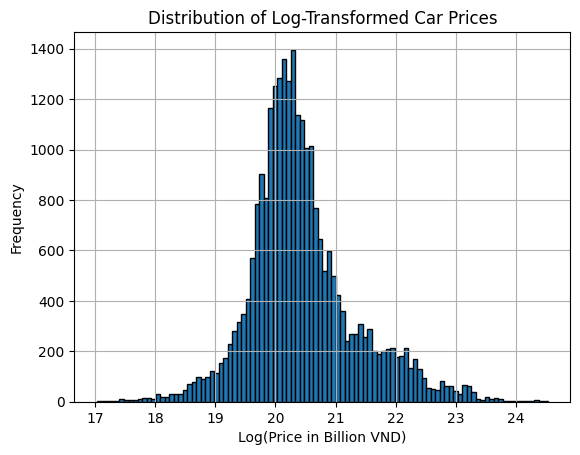

In [55]:
# Create the histogram
plt.hist(df['log_price'], bins=100, edgecolor='black')
plt.xlabel("Log(Price in Billion VND)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Car Prices")
plt.grid(True)
plt.show()

2. Mileage

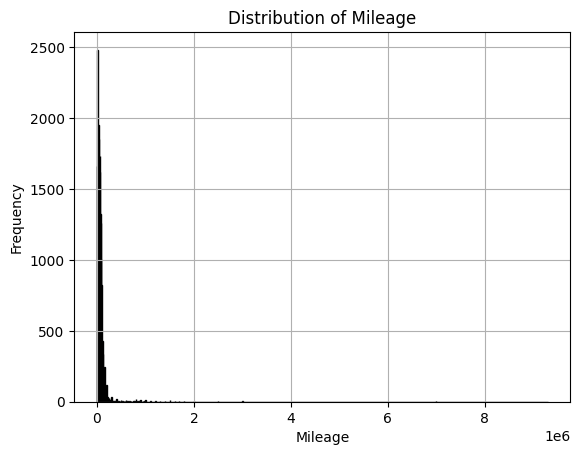

In [151]:
# Create the histogram
plt.hist(df[df['mileage']>0]["mileage"], bins=1000, edgecolor='black')
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.title("Distribution of Mileage")
plt.grid(True)
plt.show()

In [152]:
df = pd.read_csv("DataDeleteNoiseMileageWeirdBrandFillData.csv")

In [155]:
df.shape

(25794, 23)

In [161]:
# Shift the mileage by adding a small constant
data = df["mileage"].to_numpy()
shifted_data = data + 1

In [162]:
shifted_data

array([      1,       1,       1, ..., 1300001, 3839788, 1000001],
      dtype=int64)

In [163]:
# Apply Box-Cox Transformation
box_cox_transformer = PowerTransformer(method='box-cox')
transformed_data = box_cox_transformer.fit_transform(shifted_data.reshape(-1, 1))

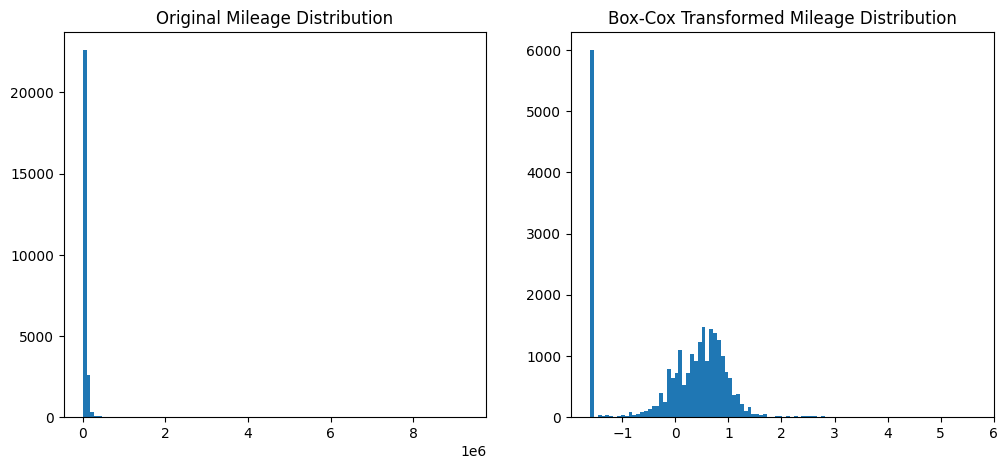

In [164]:
# Plot original and transformed Mileage distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Mileage distribution
axs[0].hist(df["mileage"], bins = 100)
axs[0].set_title("Original Mileage Distribution")

# Transformed Mileage distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Box-Cox Transformed Mileage Distribution")
plt.show()

In [170]:
# Apply Yeo-Johnson Transformation
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
transformed_data = yeo_johnson_transformer.fit_transform(data.reshape(-1, 1))

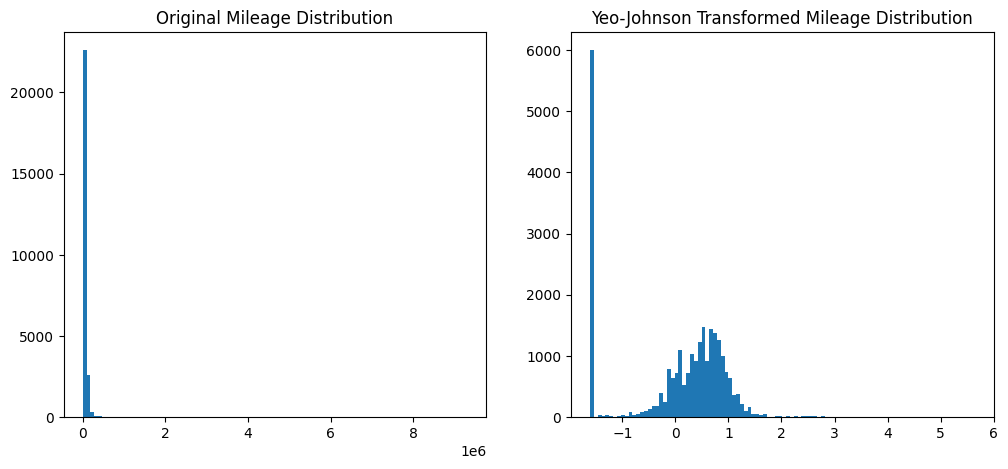

In [166]:
# Plot original and transformed Mileage distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Mileage distribution
axs[0].hist(df["mileage"], bins = 100)
axs[0].set_title("Original Mileage Distribution")

# Transformed Mileage distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Yeo-Johnson Transformed Mileage Distribution")
plt.show()

In [168]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
transformed_data = scaler.fit_transform(data.reshape(-1, 1))

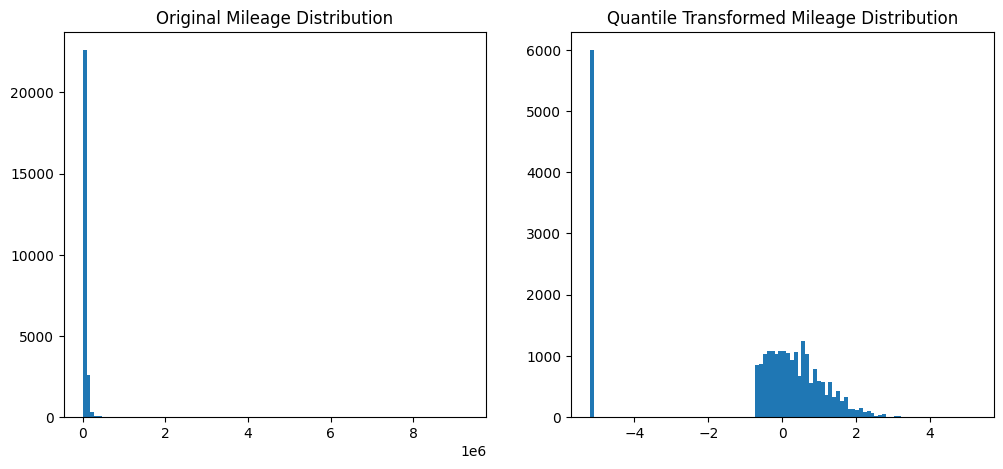

In [169]:
# Plot original and transformed Mileage distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Mileage distribution
axs[0].hist(df["mileage"], bins = 100)
axs[0].set_title("Original Mileage Distribution")

# Transformed Mileage distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Quantile Transformed Mileage Distribution")
plt.show()

Therefore, I choose Yeo-Johnson for mileage.

In [172]:
transformed_data.shape

(25794, 1)

In [175]:
data

array([      0,       0,       0, ..., 1300000, 3839787, 1000000],
      dtype=int64)

In [186]:
df["Yeo_Johnson_mileage"] = transformed_data.flatten()

In [178]:
df.shape

(25794, 24)

3. Engine capacity

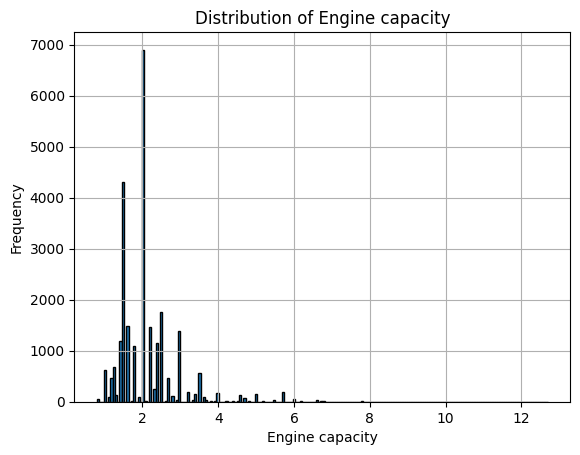

In [179]:
# Create the histogram
plt.hist(df["engine_capacity"], bins = 200, edgecolor='black')
plt.xlabel("Engine capacity")
plt.ylabel("Frequency")
plt.title("Distribution of Engine capacity")
plt.grid(True)
plt.show()

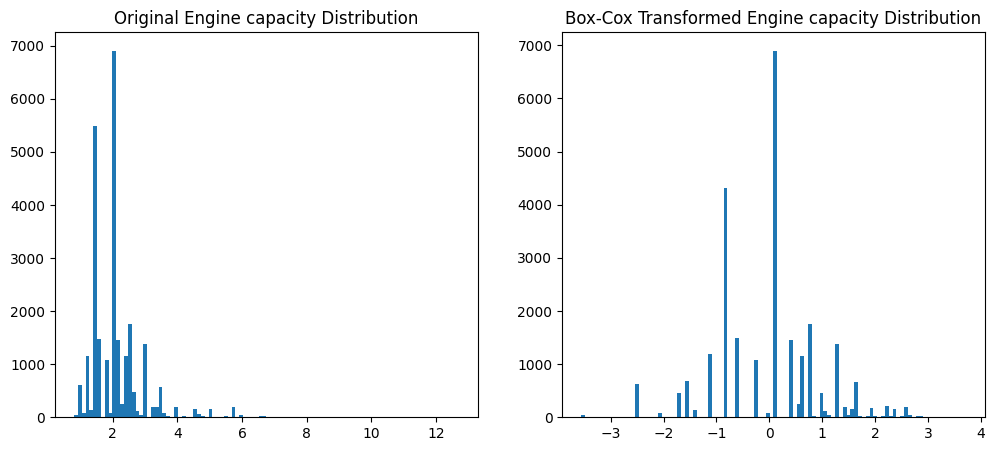

In [180]:
data = df["engine_capacity"].to_numpy()

# Apply Box-Cox Transformation
box_cox_transformer = PowerTransformer(method='box-cox')
transformed_data = box_cox_transformer.fit_transform(data.reshape(-1, 1))

# Plot original and transformed Engine capacity distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Engine capacity distribution
axs[0].hist(df["engine_capacity"], bins = 100)
axs[0].set_title("Original Engine capacity Distribution")

# Transformed Engine capacity distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Box-Cox Transformed Engine capacity Distribution")
plt.show()

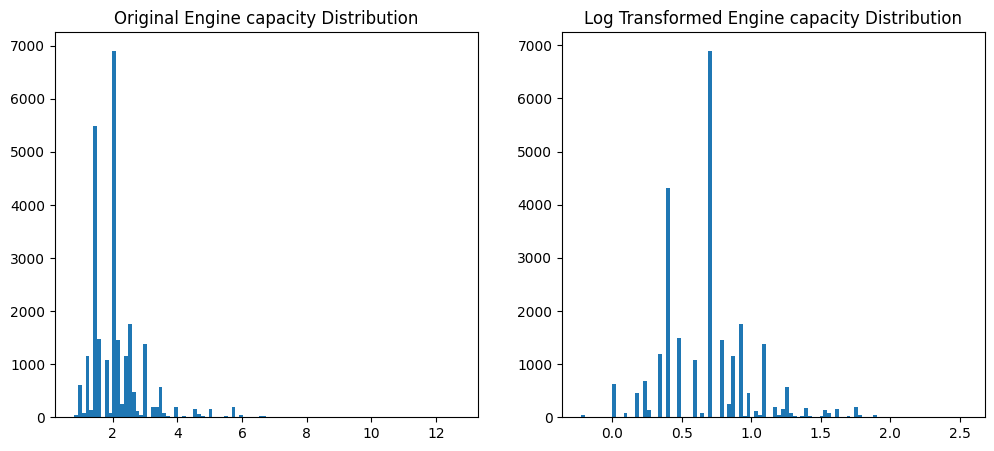

In [181]:
data = df["engine_capacity"].to_numpy()

# Apply Log Transformation
transformed_data = np.log(data)

# Plot original and transformed Engine capacity distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Engine capacity distribution
axs[0].hist(df["engine_capacity"], bins = 100)
axs[0].set_title("Original Engine capacity Distribution")

# Transformed Engine capacity distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Log Transformed Engine capacity Distribution")
plt.show()

4. Fuel consumption

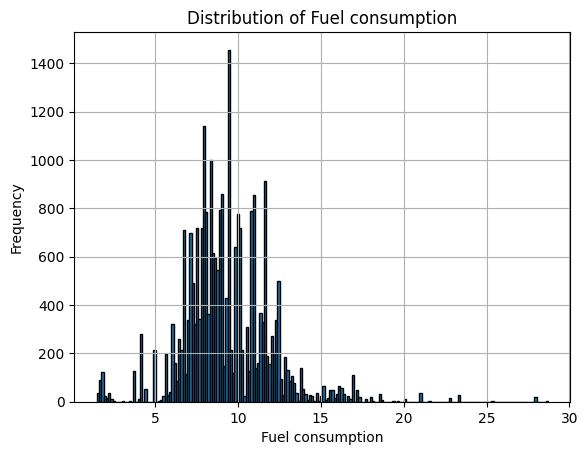

In [182]:
# Create the histogram
plt.hist(df["fuel_consumption"], bins = 200, edgecolor='black')
plt.xlabel("Fuel consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Fuel consumption")
plt.grid(True)
plt.show()

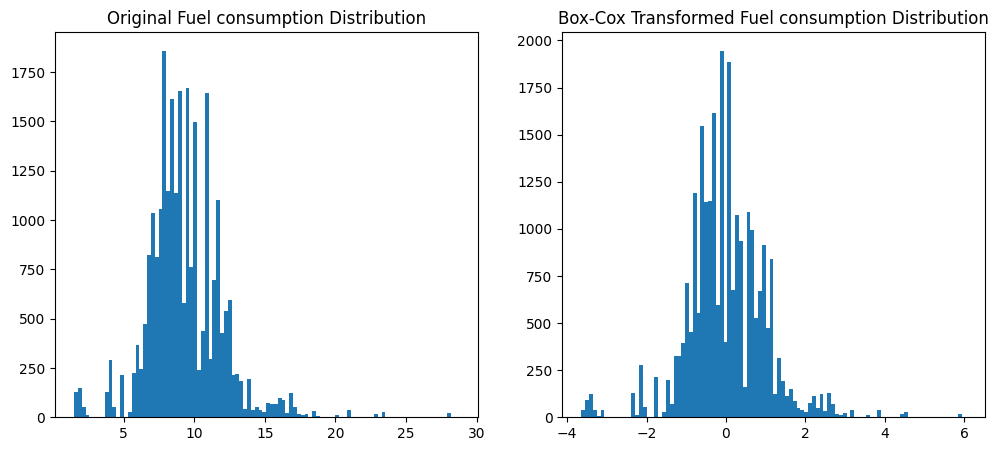

In [183]:
data = df["fuel_consumption"].to_numpy()

# Apply Box-Cox Transformation
box_cox_transformer = PowerTransformer(method='box-cox')
transformed_data = box_cox_transformer.fit_transform(data.reshape(-1, 1))

# Plot original and transformed Fuel consumption distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Fuel consumption distribution
axs[0].hist(df["fuel_consumption"], bins = 100)
axs[0].set_title("Original Fuel consumption Distribution")

# Transformed Fuel consumption distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Box-Cox Transformed Fuel consumption Distribution")
plt.show()

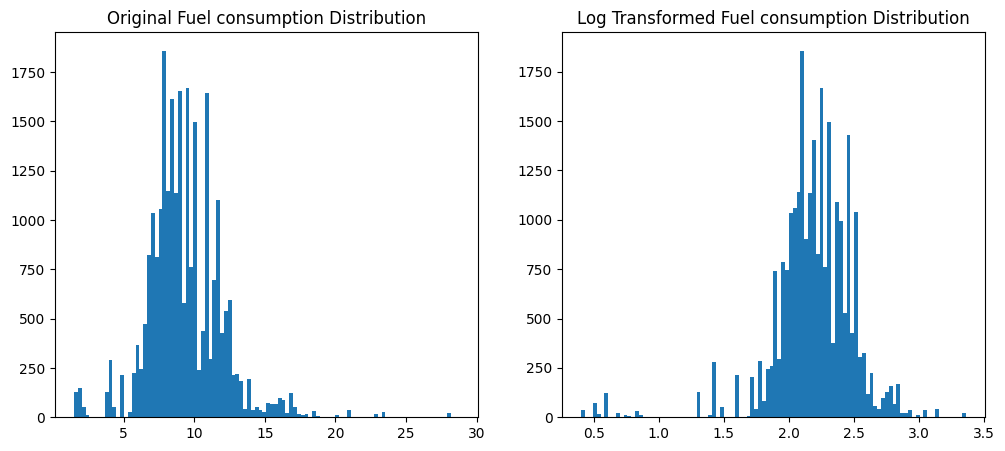

In [184]:
data = df["fuel_consumption"].to_numpy()

# Apply Log Transformation
transformed_data = np.log(data)

# Plot original and transformed Fuel consumption distributions
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Fuel consumption distribution
axs[0].hist(df["fuel_consumption"], bins = 100)
axs[0].set_title("Original Fuel consumption Distribution")

# Transformed Fuel consumption distribution
axs[1].hist(transformed_data, bins = 100)
axs[1].set_title("Log Transformed Fuel consumption Distribution")
plt.show()

In [187]:
df.to_csv("DataDeleteNoiseMileageWeirdBrandFillData.csv")

In [57]:
df.to_csv("DataDeleteNoiseMileage.csv")

# Categorical feature encoding

In [85]:
df = pd.read_csv("DataDeleteWeirdBrand_Final.csv")

In [4]:
df.set_index("ad_id", inplace = True)

In [27]:
df["car_model"].value_counts()

car_model
SUV                      8968
Sedan                    8445
Crossover                2106
Pickup                   2089
Hatchback                1963
Van/Minivan               765
Truck                     194
Coupe                     158
Convertible/Cabriolet      80
Wagon                       6
Name: count, dtype: int64

In [5]:
cur_year = 2023
df["age"] = df["year_of_manufacture"].apply(lambda x: cur_year - x)

In [6]:
df.drop(["brand", "url", "price", "condition", "year_of_manufacture", "grade"], axis = 1, inplace = True)

In [7]:
df = pd.get_dummies(df, columns = ["origin", "car_model", "exterior_color", "interior_color", "engine", "transmission", "car_name"])

In [8]:
df = pd.get_dummies(df, columns = ["drive_type"])

In [9]:
df.shape

(24774, 4762)

In [ ]:
df.head()

In [11]:
df.to_csv("DataOneHot.csv")

# Categorical feature encoding (Part 2)

In [227]:
df = pd.read_csv("DataDeleteNoiseMileageWeirdBrandFillData.csv")

In [228]:
df.set_index("ad_id", inplace = True)

In [214]:
df["car_model"].value_counts()

car_model
SUV                      9544
Sedan                    8561
Crossover                2254
Pickup                   2094
Hatchback                1976
Van/Minivan               855
Truck                     264
Coupe                     159
Convertible/Cabriolet      81
Wagon                       6
Name: count, dtype: int64

In [215]:
cur_year = 2024
df["age"] = df["year_of_manufacture"].apply(lambda x: cur_year - x)

In [216]:
df.columns

Index(['origin', 'condition', 'car_model', 'mileage', 'exterior_color',
       'interior_color', 'num_of_doors', 'seating_capacity', 'engine',
       'engine_capacity', 'transmission', 'drive_type', 'fuel_consumption',
       'brand', 'grade', 'year_of_manufacture', 'car_name', 'price', 'url',
       'price_in_billion', 'log_price', 'Brand_Ranking', 'Yeo_Johnson_mileage',
       'age'],
      dtype='object')

In [217]:
df.drop(['condition', 'brand', 'year_of_manufacture', 'grade', 'price', 'url',
       'price_in_billion', 'mileage'], axis = 1, inplace = True)

In [ ]:
df.head()

In [218]:
df.to_csv("DataVersion2.csv")

In [208]:
df = pd.get_dummies(df, columns = ["origin", "car_model", "exterior_color", "interior_color", "engine", "transmission", "car_name", "drive_type"])

In [209]:
df.shape

(25794, 5033)

In [210]:
df.head()

,num_of_doors,seating_capacity,engine_capacity,fuel_consumption,log_price,Brand_Ranking,Yeo_Johnson_mileage,age,origin_Domestic assembly,origin_Imported,...,car_name_Volvo XC90 T6 Momentum 2016,car_name_Volvo XC90 ULTIMATE 2023,car_name_Volvo XC90 Ultimate 2022 car,car_name_Volvo XC90 Ultimate B6 2023 car,car_name_Volvo XC90 Ultimate B6 AWD 2023,drive_type_4WD,drive_type_4WD or AWD,drive_type_AWD,drive_type_FWD,drive_type_RFD
ad_id,,,,,,,,,,,,,,,,,,,,,
17042,2,2,1.0,10.1,19.332963,19,2.312535,2,True,False,...,False,False,False,False,False,False,False,False,False,True
53794,5,7,3.4,12.8,22.178620,3,2.549445,2,False,True,...,False,False,False,False,False,False,False,True,False,False
73954,5,8,2.0,11.0,20.601098,3,2.397895,1,True,False,...,False,False,False,False,False,False,False,False,False,True
74150,5,5,1.8,6.5,20.440903,3,1.871802,1,False,True,...,False,False,False,False,False,False,False,False,True,False
87573,5,8,2.0,11.0,20.548912,3,2.397895,2,True,False,...,False,False,False,False,False,False,False,False,False,True


# Categorical feature encoding (Part 2)

In [ ]:
df = pd.read_csv("DataDeleteNoiseMileageWeirdBrandFillData.csv")

In [ ]:
df.set_index("ad_id", inplace = True)

In [ ]:
df["car_model"].value_counts()

car_model
SUV                      9544
Sedan                    8561
Crossover                2254
Pickup                   2094
Hatchback                1976
Van/Minivan               855
Truck                     264
Coupe                     159
Convertible/Cabriolet      81
Wagon                       6
Name: count, dtype: int64

In [ ]:
cur_year = 2024
df["age"] = df["year_of_manufacture"].apply(lambda x: cur_year - x)

In [ ]:
df.columns

Index(['origin', 'condition', 'car_model', 'mileage', 'exterior_color',
       'interior_color', 'num_of_doors', 'seating_capacity', 'engine',
       'engine_capacity', 'transmission', 'drive_type', 'fuel_consumption',
       'brand', 'grade', 'year_of_manufacture', 'car_name', 'price', 'url',
       'price_in_billion', 'log_price', 'Brand_Ranking', 'Yeo_Johnson_mileage',
       'age'],
      dtype='object')

In [ ]:
df.drop(['condition', 'brand', 'year_of_manufacture', 'grade', 'price', 'url',
       'price_in_billion', 'mileage'], axis = 1, inplace = True)

In [ ]:
df.head()

In [ ]:
df.to_csv("DataVersion2.csv")

In [ ]:
df = pd.get_dummies(df, columns = ["origin", "car_model", "exterior_color", "interior_color", "engine", "transmission", "car_name", "drive_type"])

In [ ]:
df.shape

(25794, 5033)

In [ ]:
df.head()

,num_of_doors,seating_capacity,engine_capacity,fuel_consumption,log_price,Brand_Ranking,Yeo_Johnson_mileage,age,origin_Domestic assembly,origin_Imported,...,car_name_Volvo XC90 T6 Momentum 2016,car_name_Volvo XC90 ULTIMATE 2023,car_name_Volvo XC90 Ultimate 2022 car,car_name_Volvo XC90 Ultimate B6 2023 car,car_name_Volvo XC90 Ultimate B6 AWD 2023,drive_type_4WD,drive_type_4WD or AWD,drive_type_AWD,drive_type_FWD,drive_type_RFD
ad_id,,,,,,,,,,,,,,,,,,,,,
17042,2,2,1.0,10.1,19.332963,19,2.312535,2,True,False,...,False,False,False,False,False,False,False,False,False,True
53794,5,7,3.4,12.8,22.178620,3,2.549445,2,False,True,...,False,False,False,False,False,False,False,True,False,False
73954,5,8,2.0,11.0,20.601098,3,2.397895,1,True,False,...,False,False,False,False,False,False,False,False,False,True
74150,5,5,1.8,6.5,20.440903,3,1.871802,1,False,True,...,False,False,False,False,False,False,False,False,True,False
87573,5,8,2.0,11.0,20.548912,3,2.397895,2,True,False,...,False,False,False,False,False,False,False,False,False,True


In [211]:
df.to_csv("DataOneHotVersion2.csv")

# Correlation Matrix

In [239]:
df = pd.read_csv("DataVersion2.csv")
df.head()

,ad_id,origin,car_model,exterior_color,interior_color,num_of_doors,seating_capacity,engine,engine_capacity,transmission,drive_type,fuel_consumption,car_name,log_price,Brand_Ranking,Yeo_Johnson_mileage,age
0,17042,Domestic assembly,Truck,White,Grey,2,2,Petrol,1.0,Manual,RFD,10.1,Suzuki Super Carry Truck 1.0 MT 2022,19.332963,19,2.312535,2
1,53794,Imported,SUV,Black,Black,5,7,Petrol,3.4,Automatic,AWD,12.8,Toyota Land Cruiser 3.5 V6 2022,22.178620,3,2.549445,2
2,73954,Domestic assembly,Crossover,Silver,Brown,5,8,Petrol,2.0,Automatic,RFD,11.0,Toyota Innova G 2.0 AT 2023 car,20.601098,3,2.397895,1
3,74150,Imported,SUV,White,Black,5,5,Petrol,1.8,Automatic,FWD,6.5,Toyota Corolla Cross 1.8G 2023,20.440903,3,1.871802,1
4,87573,Domestic assembly,Crossover,Silver,Grey,5,8,Petrol,2.0,Automatic,RFD,11.0,Toyota Innova G 2.0 AT 2022 car,20.548912,3,2.397895,2


In [221]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

columns_to_label = ["origin", "car_model", "exterior_color", "interior_color", "engine", "transmission", "drive_type"]

# Perform label encoding on the 'team' column
for col in columns_to_label:
    df[col] = label_encoder.fit_transform(df[col])

print(df)

         ad_id  origin  car_model  exterior_color  interior_color  \
0        17042       0          7              14               8   
1        53794       1          5               0               0   
2        73954       0          2              12               1   
3        74150       1          5              14               0   
4        87573       0          2              12               8   
...        ...     ...        ...             ...             ...   
25789  4916597       1          8              14              15   
25790  4919601       0          7              14               0   
25791  4920378       0          2              12               0   
25792  4925758       1          5               6               4   
25793  4925989       0          6               0               0   

       num_of_doors  seating_capacity  engine  engine_capacity  transmission  \
0                 2                 2       3              1.0             1   
1          

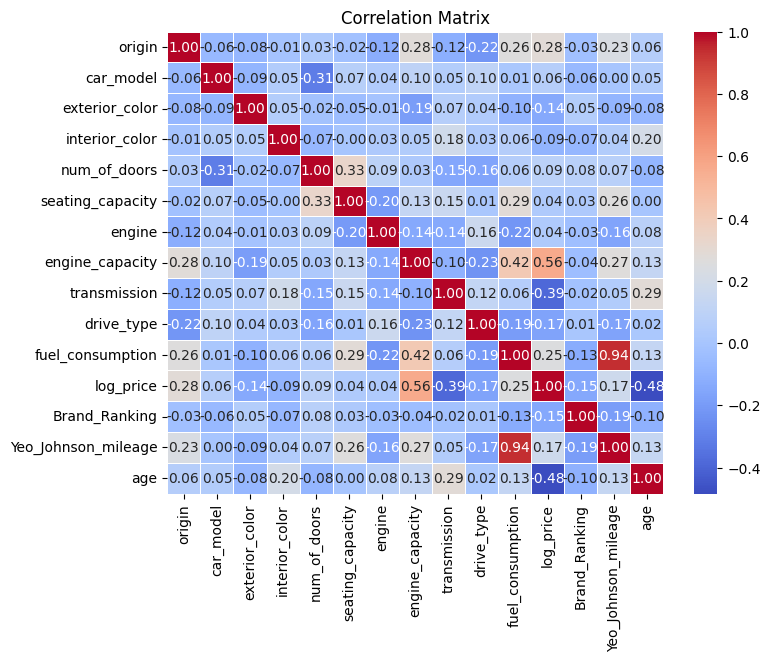

In [224]:
# Calculating correlation matrix
correlation_matrix = df.drop(columns = ['car_name', "ad_id"]).corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

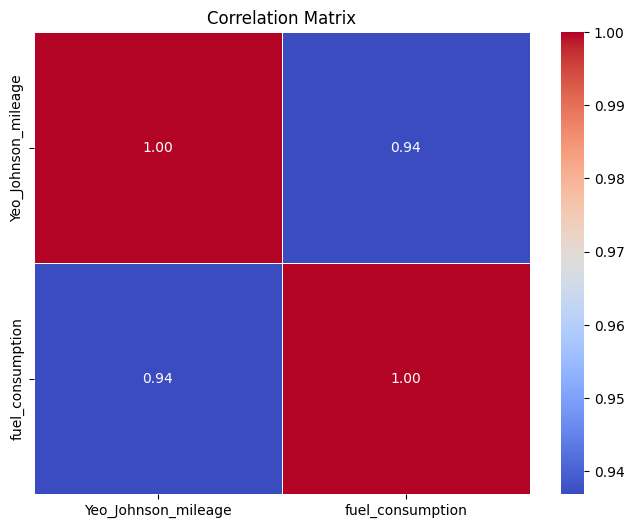

In [240]:
# Calculating correlation matrix
correlation_matrix = df[["Yeo_Johnson_mileage", "fuel_consumption"]].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Categorical feature encoding (Part 3)

In [6]:
df = pd.read_csv("DataDeleteNoiseMileageWeirdBrandFillData.csv")

In [20]:
df = pd.read_csv("DataVersion3.csv")

In [21]:
df.set_index("ad_id", inplace = True)

In [22]:
df.columns

Index(['origin', 'car_model', 'mileage', 'exterior_color', 'interior_color',
       'num_of_doors', 'seating_capacity', 'engine', 'engine_capacity',
       'transmission', 'drive_type', 'fuel_consumption', 'car_name',
       'price_in_billion', 'Brand_Ranking', 'age'],
      dtype='object')

In [ ]:
cur_year = 2024
df["age"] = df["year_of_manufacture"].apply(lambda x: cur_year - x)

In [10]:
df.columns

Index(['origin', 'condition', 'car_model', 'mileage', 'exterior_color',
       'interior_color', 'num_of_doors', 'seating_capacity', 'engine',
       'engine_capacity', 'transmission', 'drive_type', 'fuel_consumption',
       'brand', 'grade', 'year_of_manufacture', 'car_name', 'price', 'url',
       'price_in_billion', 'log_price', 'Brand_Ranking', 'Yeo_Johnson_mileage',
       'age'],
      dtype='object')

In [11]:
df.drop(['condition', 'brand', 'year_of_manufacture', 'grade', 'price', 'url',
       'log_price', 'Yeo_Johnson_mileage'], axis = 1, inplace = True)

In [12]:
df.head()

,origin,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,engine_capacity,transmission,drive_type,fuel_consumption,car_name,price_in_billion,Brand_Ranking,age
ad_id,,,,,,,,,,,,,,,,
17042,Domestic assembly,Truck,0,White,Grey,2,2,Petrol,1.0,Manual,RFD,10.1,Suzuki Super Carry Truck 1.0 MT 2022,0.249,19,2
53794,Imported,SUV,0,Black,Black,5,7,Petrol,3.4,Automatic,AWD,12.8,Toyota Land Cruiser 3.5 V6 2022,4.286,3,2
73954,Domestic assembly,Crossover,0,Silver,Brown,5,8,Petrol,2.0,Automatic,RFD,11.0,Toyota Innova G 2.0 AT 2023 car,0.885,3,1
74150,Imported,SUV,0,White,Black,5,5,Petrol,1.8,Automatic,FWD,6.5,Toyota Corolla Cross 1.8G 2023,0.754,3,1
87573,Domestic assembly,Crossover,0,Silver,Grey,5,8,Petrol,2.0,Automatic,RFD,11.0,Toyota Innova G 2.0 AT 2022 car,0.840,3,2


In [15]:
df.to_csv("DataVersion3.csv")

In [23]:
df = pd.get_dummies(df, columns = ["origin", "car_model", "exterior_color", "interior_color", "engine", "transmission", "car_name", "drive_type"])

In [24]:
df.shape

(25794, 5033)

In [257]:
df.head()

,num_of_doors,seating_capacity,engine_capacity,fuel_consumption,price_in_billion,Brand_Ranking,Yeo_Johnson_mileage,age,origin_Domestic assembly,origin_Imported,...,car_name_Volvo XC90 T6 Momentum 2016,car_name_Volvo XC90 ULTIMATE 2023,car_name_Volvo XC90 Ultimate 2022 car,car_name_Volvo XC90 Ultimate B6 2023 car,car_name_Volvo XC90 Ultimate B6 AWD 2023,drive_type_4WD,drive_type_4WD or AWD,drive_type_AWD,drive_type_FWD,drive_type_RFD
ad_id,,,,,,,,,,,,,,,,,,,,,
17042,2,2,1.0,10.1,0.249,19,2.312535,2,True,False,...,False,False,False,False,False,False,False,False,False,True
53794,5,7,3.4,12.8,4.286,3,2.549445,2,False,True,...,False,False,False,False,False,False,False,True,False,False
73954,5,8,2.0,11.0,0.885,3,2.397895,1,True,False,...,False,False,False,False,False,False,False,False,False,True
74150,5,5,1.8,6.5,0.754,3,1.871802,1,False,True,...,False,False,False,False,False,False,False,False,True,False
87573,5,8,2.0,11.0,0.840,3,2.397895,2,True,False,...,False,False,False,False,False,False,False,False,False,True


In [25]:
df.to_csv("DataOneHotVersion3.csv")

# Categorical feature encoding (Part 4)

In [3]:
df = pd.read_csv("DataVersion3.csv")
df.set_index("ad_id", inplace = True)

In [ ]:
df.head()